# Modelo Presa-Predador
- $x(t) \to$ presa;
- $y(t) \to$ predador
$$\begin{cases}\dfrac{dx}{dt} = \alpha x - \beta xy \\ \dfrac{dy}{dt} = \delta xy - \gamma y \end{cases}$$

### Matriz Jacobiana:
#### Matriz de sensibilidade das equações em relação às variáveis

$$J = \begin{bmatrix} \alpha - \beta\ y & -\beta\ x \\ \delta\ y & \delta\ x - \gamma \end{bmatrix}$$


### Pontos de Equilíbrio:
$$\dfrac{d}{dt} \binom{x}{y} = \binom{0}{0} \Longrightarrow \binom{x}{y} \in \left\{ \binom{0}{0}, \binom{\gamma\ /\ \delta}{\alpha\ /\ \beta} \right\} \equiv \left\{ p_1, p_2 \right\}$$

## Objetivo:
### Solucionar numericamente o problema via Runge-Kutta

In [1]:
import matplotlib.pyplot as plt
import numpy as np

def f_x_y_presa(x, y, alfa, beta):
    return (alfa * x) - (beta * x * y)

def f_x_y_predador(x, y, delta, gama):
    return (delta * x * y) - (gama * y)

In [2]:
def runge_kutta_presa_predador(x_inicial, y_inicial, alfa,\
                               beta, delta, gama, h, N=1j):
    LX, LY = [x_inicial], [y_inicial]
    for _ in range(N):
        x_inicial, y_inicial = LX[-1], LY[-1]
        y_k_presa = x_inicial
        f1_presa = f_x_y_presa(x_inicial, y_inicial, alfa, beta)
        f2_presa = f_x_y_presa(x_inicial + h, y_inicial + (h * f1_presa), alfa, beta)
        y_k_mais_1_presa = y_k_presa + (h/2) * (f1_presa + f2_presa)

        y_k_predador = y_inicial
        f1_predador = f_x_y_predador(x_inicial, y_inicial, delta, gama)
        f2_predador = f_x_y_predador(x_inicial + h, y_inicial + (h * f1_predador), delta, gama)
        y_k_mais_1_predador = y_k_predador + (h / 2) * (f1_predador + f2_predador)
        LX.append(y_k_mais_1_presa)
        LY.append(y_k_mais_1_predador)
        # TODO find & replace: y_k_mais_1_presa e etc. viram "x_?"
    return LX, LY

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 18.8 µs


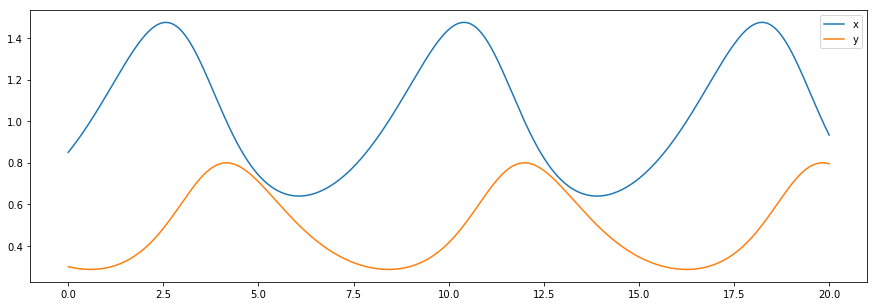

In [3]:
%time
alfa, beta, gama, delta = 2/3, 4/3, 1., 1.  #alfa, beta, gama, delta = 1,1,1,1
x = gama / delta - .15
y = alfa /  beta - .20
# x, y = 0, 0
t_inicial = 0.0
t_final = 20.0
N = 200000
h = (t_final - t_inicial) / N
ts = np.linspace(t_inicial, t_final, N+1)

res_x, res_y = runge_kutta_presa_predador(x, y, alfa, beta, delta, gama, h, N)

plt.figure(figsize=(15,5))
plt.plot(ts, res_x, label="x")
plt.plot(ts, res_y, label="y")

plt.legend(loc=0)
# plt.ylim([0, 1e-1])
plt.show()

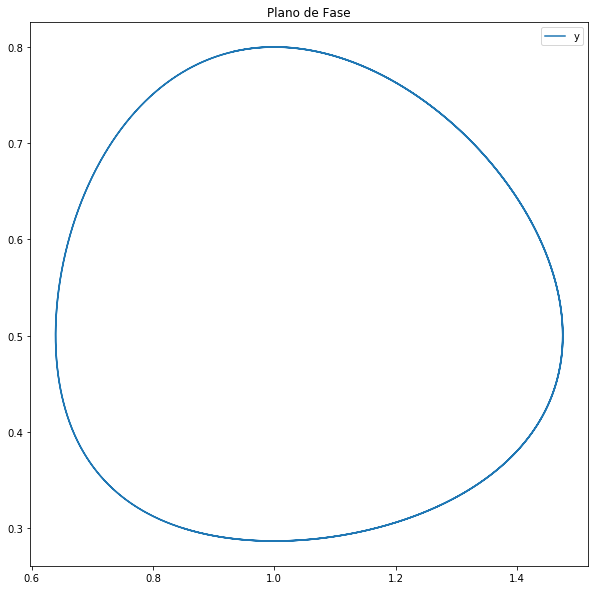

In [4]:
plt.figure(figsize=(10,10))
plt.title("Plano de Fase")
plt.plot(res_x, res_y, label="y")
plt.legend(loc=0)
plt.show()

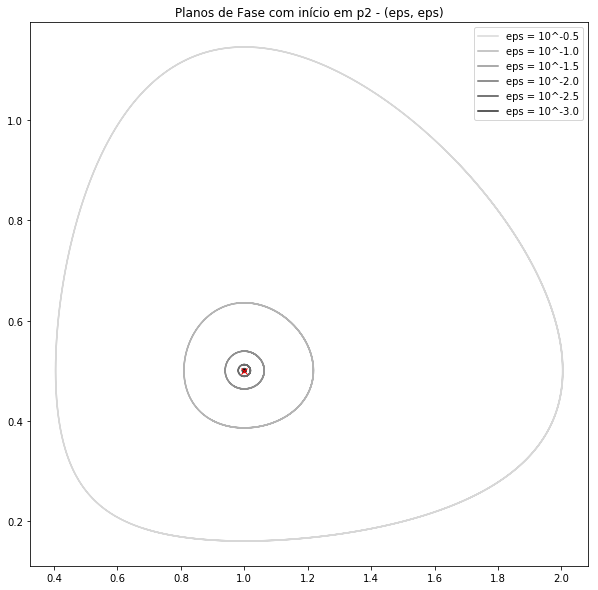

In [11]:
wat = lambda x: -0.276 * x + 0.02

plt.figure(figsize=(10,10))
plt.title("Planos de Fase com início em p2 - (eps, eps)")
for eps in (.316, .100, .0316, .0100, .00316, .00100):
    x = gama / delta - eps
    y = alfa /  beta - eps
    cc = np.log10(eps)
    res_x, res_y = runge_kutta_presa_predador(x, y, alfa, beta, delta, gama, h, N)
    plt.plot(res_x, res_y, color=(0,0,0,wat(cc)), label="eps = 10^{:.1f}".format(cc))
plt.plot([gama / delta], [alfa /  beta], "rx")
plt.legend(loc=0)
plt.show()

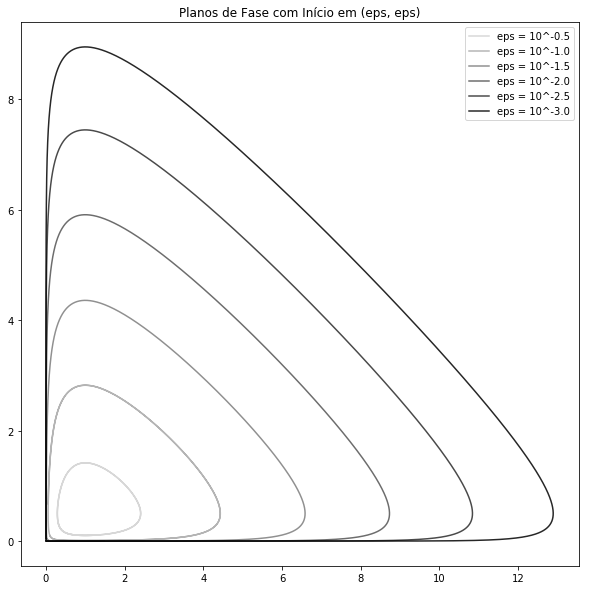

In [6]:
wat = lambda x: -0.276 * x + 0.02

plt.figure(figsize=(10,10))
plt.title("Planos de Fase com Início em (eps, eps)")
for eps in (.316, .100, .0316, .0100, .00316, .00100):
    # x = gama / delta - eps
    # y = alfa /  beta - eps
    x, y = eps, eps
    cc = np.log10(eps)
    res_x, res_y = runge_kutta_presa_predador(x, y, alfa, beta, delta, gama, h, N)
    plt.plot(res_x, res_y, color=(0,0,0,wat(cc)), label="eps = 10^{:.1f}".format(cc))
plt.legend(loc=0)
plt.show()

# $$\ddot \smile$$